# Project: Nutrition Data Visualization and Linear Regression Model on 80 Cereal Products

## Learning Objective
Using different libraries to clean, transform and perform Linear Regression

## Dataset
Link: https://www.kaggle.com/crawford/80-cereals

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data as Pandas Dataframe and clean the dataset

In [31]:
# Load dataset
cereal_df = pd.read_csv('./data/cereal.csv')

In [32]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [33]:
# Inspect dataset
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [34]:
# Check for missing values in the dataset
cereal_df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# Let's look at the nutritional values of these 80 cereals. What are the correlations among their nutrition contents? 

In [35]:
# Drop irrelevant fields
fields = ['shelf', 'weight', 'cups', 'rating']
cereal_df_new = cereal_df.drop(fields, axis=1)
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [36]:
# Get correlation data on numerical values (for nutional info)
cereal_corr = cereal_df_new.corr()
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [37]:
# Ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [38]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [39]:
# Np's triu: returns only upper triangle matrix
# If want to return lower triangle matrix, use np.tril
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

<AxesSubplot:>

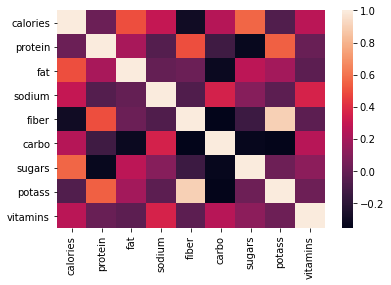

In [40]:
# Draw full heatmap
# As the upper part and the lower part of the triangle matrix is the same, we can use either of them and store the values inside mask

sns.heatmap(data=cereal_corr)

<AxesSubplot:>

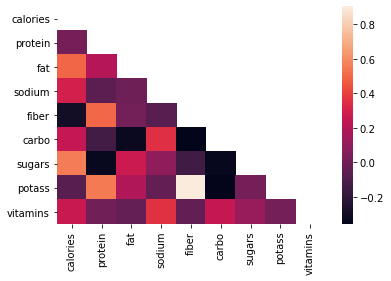

In [41]:
# Draw heatmap with mask

sns.heatmap(data=cereal_corr, mask=mask)

In [42]:
# Note that when removing the upper triangle, there are two missing cells in our matrix (vitamins and calories)
adjusted_mask = mask[1:, :-1] # Select everything except the first column and the last row
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [43]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]
adjusted_cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699


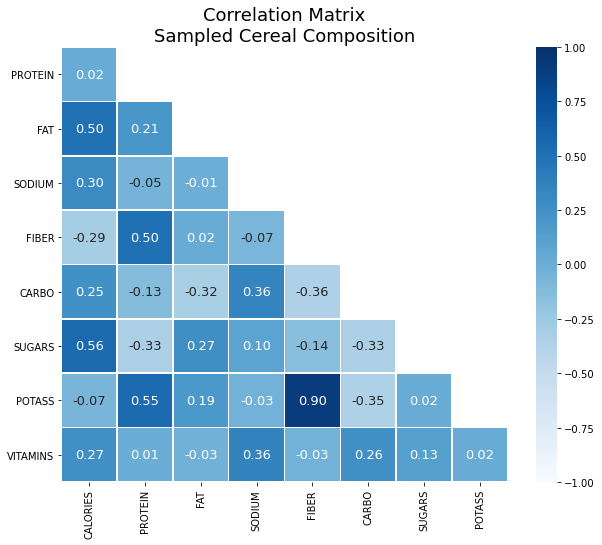

In [44]:

fig, ax = plt.subplots(figsize=(10,8))  # Fix size of the figure

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask, annot=True, annot_kws={'fontsize':13}, fmt=".2f", cmap="Blues",
           vmin=-1, vmax=1, linecolor='white', linewidth=0.5)  

yticks = [i.upper() for i in adjusted_cereal_corr.index] # Capitalize labels
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0);
ax.set_xticklabels(xticks, rotation=90);

title = 'Correlation Matrix\nSampled Cereal Composition'
ax.set_title(title, loc='center', fontsize=18);

From the chart, we can see that the positive correlation between Fiber and Potass is the highest (0.90) while Carbo and Potass have the strongest negative correlation relationship (-0.35)

# Given the dataset, let's try to predict the rating of different cereals 

I will use the linear regression model to make my predictions.

In [45]:
# Import sklearn to pre-process dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import Linear Regression from sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 

In [46]:
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [47]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


## Pre-processing

Even though cereal_df.info() doesn't show any null values, note that this dataset uses -1 to denote NaN values (as seen in position 4 of 'Almond Delight').
Hence, I will replace -1 with 'NaN'

In [48]:
# Get number of -1 in each column
(cereal_df == -1).sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [49]:
# Replace -1 with NaN
cereal_df = cereal_df.replace(-1, np.NaN)

# Check the new DataFrame
cereal_df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

Since the dataset is relatively small (with 77 values), I would replace NaN with mean of each column instead of dropping missing values entirely.

In [50]:
for column in ['carbo', 'sugars', 'potass']:
    cereal_df[column] = cereal_df[column].fillna(cereal_df[column].mean())

In [51]:
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


Because the two column 'mfr' and 'type' are string values, I would proceed to encode them into numeric values.

In [52]:
# Check unique values in 'mfr' and 'type' column
for column in ['mfr', 'type']:
    print(list(cereal_df[column].unique()))

['N', 'Q', 'K', 'R', 'G', 'P', 'A']
['C', 'H']


Since column 'type' has only 2 values, I would encode it with 1 for 'H' and 0 for 'C'.

In [53]:
cereal_df['type'] = cereal_df['type'].apply(lambda x: 1 if x == 'H' else 0)

In [80]:
# Get dummies values (0,1) for each unique values in 'mfr' column
dummies = pd.get_dummies(cereal_df['mfr']) 

# Merge the new column with existing dataset
cereal_df = pd.concat([cereal_df, dummies], axis=1)

# Drop original 'mfr' and 'name' column with string values
cereal_df = cereal_df.drop('mfr', axis=1)
cereal_df = cereal_df.drop('name', axis=1)

cereal_df

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,weight,cups,rating,A,G,K,N,P,Q,R
0,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,...,1.0,0.75,34.384843,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,110,2,1,250,0.0,21.0,3.0,60.000000,25,...,1.0,0.75,39.106174,0,1,0,0,0,0,0
73,0,110,1,1,140,0.0,13.0,12.0,25.000000,25,...,1.0,1.00,27.753301,0,1,0,0,0,0,0
74,0,100,3,1,230,3.0,17.0,3.0,115.000000,25,...,1.0,0.67,49.787445,0,0,0,0,0,0,1
75,0,100,3,1,200,3.0,17.0,3.0,110.000000,25,...,1.0,1.00,51.592193,0,1,0,0,0,0,0


## Splitting and Scaling
Subsequently, I would create a linear regression model between 'rating' and other columns ('type', 'calories', 'mfr' etc).

In [55]:
# Rating is the column in which we would want to predict
y = cereal_df.loc[:, 'rating']

# Other columns are our multiple variables
x = cereal_df.drop('rating', axis=1)

In [57]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,A,G,K,N,P,Q,R
0,-0.201347,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,0.957813,-0.198067,-2.123870,-0.114708,-0.632456,-0.652630,3.439961,-0.363803,-0.340503,-0.340503
1,-0.201347,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764055,0.225316,0.526376,-1.27255,0.957813,-0.198067,0.774053,-0.114708,-0.632456,-0.652630,-0.290701,-0.363803,2.936835,-0.340503
2,-0.201347,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.023374,-0.468901,3.206550,-0.14627,0.957813,-0.198067,-2.123870,-0.114708,-0.632456,1.532262,-0.290701,-0.363803,-0.340503,-0.340503
3,-0.201347,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.764055,-1.625929,3.351425,-0.14627,0.957813,-0.198067,-1.388576,-0.114708,-0.632456,1.532262,-0.290701,-0.363803,-0.340503,-0.340503
4,-0.201347,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.208138,0.225316,0.000000,-0.14627,0.957813,-0.198067,-0.307262,-0.114708,-0.632456,-0.652630,-0.290701,-0.363803,-0.340503,2.936835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.201347,0.161019,-0.501495,-0.012988,1.084510,-0.908824,1.607098,-0.931712,-0.560180,-0.14627,0.957813,-0.198067,-0.307262,-0.114708,1.581139,-0.652630,-0.290701,-0.363803,-0.340503,-0.340503
73,-0.201347,0.161019,-1.420902,-0.012988,-0.236238,-0.908824,-0.467457,1.150938,-1.067240,-0.14627,-0.251230,-0.198067,0.774053,-0.114708,1.581139,-0.652630,-0.290701,-0.363803,-0.340503,-0.340503
74,-0.201347,-0.355585,0.417912,-0.012988,0.844374,0.358155,0.569820,-0.931712,0.236628,-0.14627,-1.460273,-0.198067,-0.653283,-0.114708,-0.632456,-0.652630,-0.290701,-0.363803,-0.340503,2.936835
75,-0.201347,-0.355585,0.417912,-0.012988,0.484170,0.358155,0.569820,-0.931712,0.164191,-0.14627,-1.460273,-0.198067,0.774053,-0.114708,1.581139,-0.652630,-0.290701,-0.363803,-0.340503,-0.340503


## Training, Validation and Test Sets

Splitting data is necessary to avoid biasness of our prediction model. In this case, I will attempt to split the original dataset into 2 subsets:
- The training set: is applied to fit our model. For instance, the training set is used to find the coefficients of our model
- The test set: is used to unbiasedly evaluate the final model. The test set would not be used for fitting or validation

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50)

# Define the linear regression model
model = linear_model.LinearRegression()

# Build the training model
model.fit(x_train, y_train)

# Apply training model to make prediction (on test sets)
y_pred = model.predict(x_test)

# Print model performance
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' 
     % mean_squared_error(y_test, y_pred))
print('R Square:', r2_score(y_test, y_pred))

Coefficient: [-4.27420922e-01 -3.58728893e+00  2.78685668e+00 -2.35980061e+00
 -4.17453344e+00  6.22491523e+00  1.62991120e+00 -5.77588594e+00
 -1.73686316e+00 -1.25951377e+00  3.87031339e-01  1.38897061e+00
  3.32566302e-01  1.02323931e-01 -2.59873490e-01  1.57960600e-01
  4.66356774e-01  1.15560266e-03 -5.03298620e-01  2.02240684e-01]
Intercept: 42.625606418574506
Mean squared error (MSE): 1.70
R Square: 0.989486756868451


In [69]:
print(cereal_df.columns)

Index(['type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'A', 'G', 'K', 'N', 'P', 'Q', 'R'],
      dtype='object')


Based on the model results above, our multiple linear regression is:

Y = -4.27420922e-01*(type) -3.58728893e+00*(calories) + 2.78685668e+00*(protein) + ... + 42.625606418574506

Interpretation:
- For example, a one unit of increase in calories is associated with 3.58728893 unit decrease in rating, holding other factors constant. 
- Our R-square is quite high (~0.98), indicating that 98% of variability in ratings can be explained by our model.
- We can also estimate the rating of a Cold Honey Nut Cheeros cereal, with a 110 calories, 1.5g fat and 2g protein from Manufacturer A is:

In [81]:
-4.27420922*0 + -3.58728893*110 + -2.35980061*1.5 + 2.78685668*2 + 1.02323931*1

-391.54453054500004

Clearly a cold cereal with a lot of calories and a very low protein nutrition would not result in a positive rating from customer survey!